In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from os import path

from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model

## HeatMap for Carbon metabolsim

In [2]:
processed = path.join("..","data","processed_data")
data = pd.read_csv(path.join(processed,"C_metabolism.csv"),index_col=0, sep="\t")
data.head()

,HexR,NagQ,EutR,FruR,GltR,GlpR,PtxS
Glucose,1.52,-1.83,0.78,-1.63,-1.53,-1.49,2.69
Sucrose,1.71,-1.91,-3.39,-4.36,-21.64,0.29,-0.14
Fructose,-0.37,0.34,0.53,10.56,-11.61,0.87,0.59
GlcNAc,0.67,16.13,0.47,2.81,-11.47,-0.47,0.24
Pyruvate,0.65,0.33,-0.35,-3.43,-15.43,0.78,-0.41


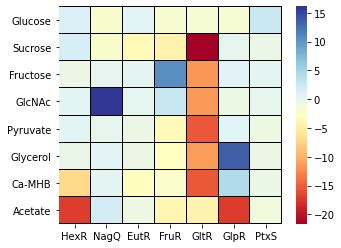

In [3]:
plt.figure(figsize=(5,4))

hm=sns.heatmap(data,linewidths=0.01,linecolor="k",  cmap="RdYlBu")

## Scatter plot for Amino Acids

<AxesSubplot:xlabel='MmsR iModulon Activity', ylabel='LiuR iModulon Activity'>

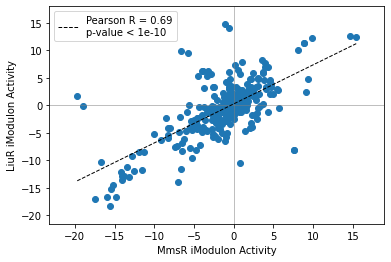

In [4]:
ica_data = load_json_model('../paeru_104_imodulon_ica.json')
compare_activities(ica_data,'MmsR','LiuR')

## Barplot for iModulons for Amino Acids

In [5]:
liur_std_yhjh = np.std([12.52,12.60])
mmsr_std_yhjh = np.std([15.42,14.60])
phh_std_yhjh = np.std([-15.06,-14.26])
dhcr_std_yhjh = np.std([-0.85,-1.08])

liur_std_biofilm_wt = np.std([12.26, 11.35])
mmsr_std_biofilm_wt = np.std([8.90, 9.80])
phhr_std_biofilm_wt = np.std([11.29, 9.40])
dhcr_std_biofilm_wt = np.std([5.05,5.72])

liur_std_pambl = np.std([4.80, 2.41])
mmsr_std_pambl = np.std([9.37, 9.10])
phhr_std_pambl = np.std([5.37, 4.42])
dhcr_std_pambl = np.std([2.56,2.59])


liur_std_crc = np.std([11.29, 10.04])
mmsr_std_crc = np.std([8.90, 8.07])
phhr_std_crc = np.std([1.58, 2.90])
dhcr_std_crc = np.std([-3.01,-1.29])

liur_std_gent = np.std([6.52, 5.83, 6.07])
mmsr_std_gent = np.std([0.50, 2.41, -0.60])
phhr_std_gent = np.std([7.30, 7.20, 6.91])
dhcr_std_gent = np.std([-2.67,-3.27,-3.81])

liur_std_nano2_wt = np.std([7.95, 7.27])
mmsr_std_nano2_wt = np.std([1.09, 0.20])
phhr_std_nano2_wt = np.std([5.03, 4.73])
dhcr_std_nano2_wt = np.std([-9.52,-9.34])

liur_std_cisplatin = np.std([9.98, 9.60])
mmsr_std_cisplatin = np.std([-6.63, -5.78])
phhr_std_cisplatin = np.std([2.24, 2.44])
dhcr_std_cisplatin = np.std([2.37,2.50])

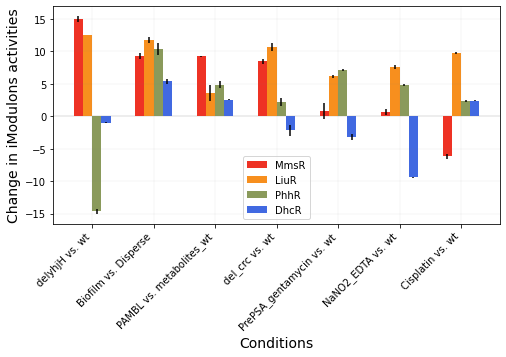

In [6]:
mmsr_means, mmsr_std = ( 15.01, 9.34, 9.23, 8.48, 0.77, 0.65, -6.20), (mmsr_std_yhjh,mmsr_std_biofilm_wt, mmsr_std_pambl, mmsr_std_crc, mmsr_std_gent, mmsr_std_nano2_wt, mmsr_std_cisplatin)
liur_means, liur_std = ( 12.56, 11.80, 3.60, 10.67, 6.14, 7.61, 9.79), (liur_std_yhjh, liur_std_biofilm_wt, liur_std_pambl, liur_std_crc,  liur_std_gent, liur_std_nano2_wt,liur_std_cisplatin)
phhr_means, phhr_std = ( -14.66, 10.34, 4.90, 2.23, 7.14, 4.88, 2.35), (phh_std_yhjh, phhr_std_biofilm_wt, phhr_std_pambl,  phhr_std_crc,  phhr_std_gent,  phhr_std_nano2_wt, phhr_std_cisplatin)
dhcr_means, dhcr_std = (-0.96, 5.39, 2.58, -2.15,-3.25, -9.43, 2.43 ),(dhcr_std_yhjh, dhcr_std_biofilm_wt,dhcr_std_pambl, dhcr_std_crc,dhcr_std_gent, dhcr_std_nano2_wt, dhcr_std_cisplatin)

ind = np.arange(len(mmsr_means))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(ind-0.30, mmsr_means, 0.15, yerr=mmsr_std,
                label='MmsR', color='#EE3224')
rects2 = ax.bar(ind-0.15, liur_means, 0.15, yerr=liur_std,
                label='LiuR',color='#F78F1E')
rects3 = ax.bar(ind+0.0, phhr_means, 0.15, yerr=phhr_std,
                label='PhhR',color='#8A9A5B')
rects4 = ax.bar(ind+0.15, dhcr_means, 0.15, yerr=dhcr_std,
                label='DhcR',color='royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Change in iModulons activities', fontsize=14)
ax.set_xlabel('Conditions', fontsize=14)
ax.set_xticks(ind-0.075)
ax.set_xticklabels(('delyhjH vs. wt','Biofilm vs. Disperse',
                    'PAMBL vs. metabolites_wt','del_crc vs. wt','PrePSA_gentamycin vs. wt',   
                    'NaNO2_EDTA vs. wt','Cisplatin vs. wt'),rotation=45,horizontalalignment="right")

ax.axhline(y=0,xmin=0, xmax=2, c="black", linewidth=0.10, zorder=0, ls='-')

ax.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.1)

plt.show()